# Read DataSets

In [3]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('./PDM-RG20r1a3b4.csv')
df1.head(3)

,Game,Fc_new,Fc,Fc_delta,Fg,Q_new,Q,Q_delta,Uc_new,Uc,Uc_delta,Ug_new,Ug,Ug_delta,Cc_new,Cc,Cc_delta,Cg_new,Cg,Cg_delta
0,Bike Rider,1300,1200,100,177,40.565724,40.382696,0.183028,35.996672,39.059900,-3.063228,100.000000,100.000000,0.000000,23.397837,23.43594,-0.038103,32.596685,32.596685,0.000000
1,Bike Rider,1300,1200,100,266,59.700499,60.066667,-0.366168,53.206323,57.008333,-3.802010,99.870216,99.983333,-0.113117,34.584110,34.20500,0.379110,48.923531,48.978944,-0.055413
2,Bike Rider,1300,1200,100,350,60.066667,60.066667,0.000000,54.218333,57.831667,-3.613334,88.453333,88.253333,0.200000,35.241916,34.69900,0.542916,57.014119,56.885205,0.128913


In [4]:
features1 = ['Fc_delta','Q_delta', 'Uc_delta', 'Ug_delta', 'Q', 'Uc', 'Ug', 'Cc','Cg']
df1 = df1[features1]
print(df1.shape)
df1.head(3)

(4320, 9)


,Fc_delta,Q_delta,Uc_delta,Ug_delta,Q,Uc,Ug,Cc,Cg
0,100,0.183028,-3.063228,0.000000,40.382696,39.059900,100.000000,23.43594,32.596685
1,100,-0.366168,-3.802010,-0.113117,60.066667,57.008333,99.983333,34.20500,48.978944
2,100,0.000000,-3.613334,0.200000,60.066667,57.831667,88.253333,34.69900,56.885205


In [6]:
df2 = pd.read_csv('./PDM-RG20r2b3a4.csv')
features2 = ['Fg_delta','Q_delta', 'Uc_delta', 'Ug_delta', 'Q', 'Uc', 'Ug', 'Cc','Cg']
df2 = df2[features2]
print(df2.shape)

(2700, 9)


# Analyze Data with Visualization

In [ ]:
#_ = df1.hist(bins=10,figsize=(9,7),grid=False)

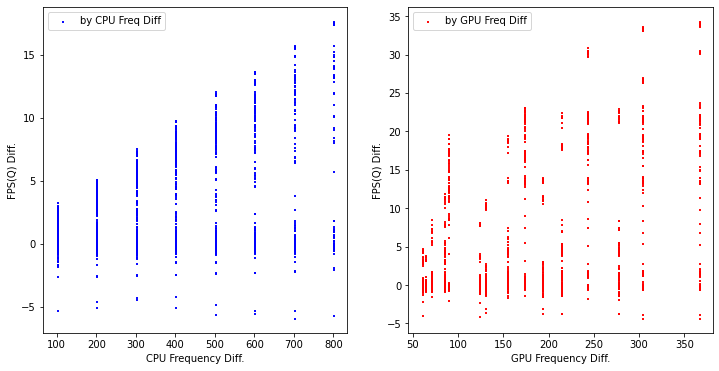

In [7]:
import matplotlib.pyplot as plt 

X1 = df1['Fc_delta']
y1 = df1['Q_delta']

fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(X1, y1, s=1, c='b', marker = 's', label='by CPU Freq Diff')
plt.xlabel('CPU Frequency Diff.')
plt.ylabel('FPS(Q) Diff.')
plt.legend()

X2 = df2['Fg_delta']
y2 = df2['Q_delta']

plt.subplot(122)
plt.scatter(X2, y2, s=1, c='r', marker = 's', label='by GPU Freq Diff')
plt.xlabel('GPU Frequency Diff.')
plt.ylabel('FPS(Q) Diff.')
plt.legend()
plt.show()

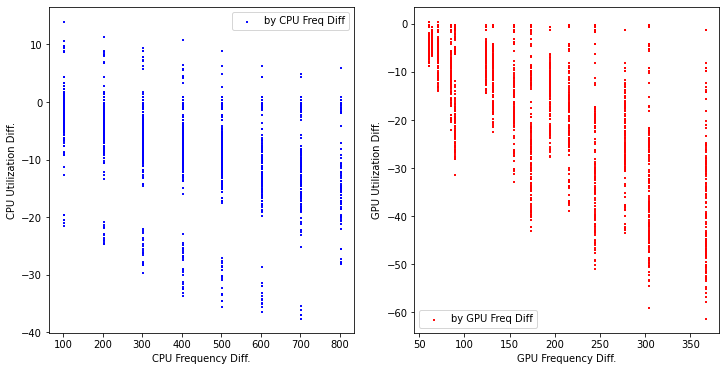

In [8]:
import matplotlib.pyplot as plt 

X1 = df1['Fc_delta']
y1 = df1['Uc_delta']

fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(X1, y1, s=1, c='b', marker = 's', label='by CPU Freq Diff')
plt.xlabel('CPU Frequency Diff.')
plt.ylabel('CPU Utilization Diff.')
plt.legend()

X2 = df2['Fg_delta']
y2 = df2['Ug_delta']

plt.subplot(122)
plt.scatter(X2, y2, s=1, c='r', marker = 's', label='by GPU Freq Diff')
plt.xlabel('GPU Frequency Diff.')
plt.ylabel('GPU Utilization Diff.')
plt.legend()
plt.show()

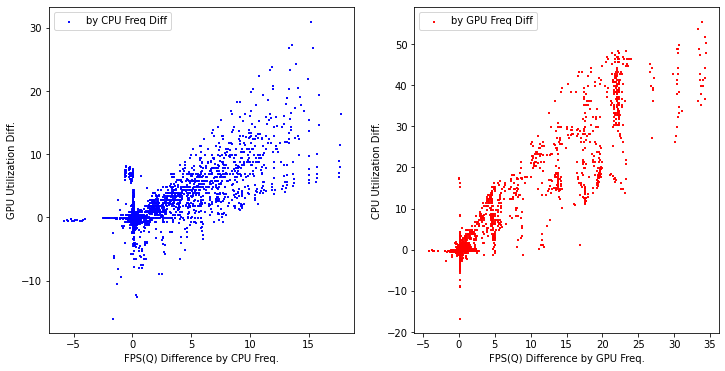

In [9]:
import matplotlib.pyplot as plt 

X1 = df1['Q_delta']
y1 = df1['Ug_delta']

fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(X1, y1, s=1, c='b', marker = 's', label='by CPU Freq Diff')
plt.xlabel('FPS(Q) Difference by CPU Freq.')
plt.ylabel('GPU Utilization Diff.')
plt.legend()

X2 = df2['Q_delta']
y2 = df2['Uc_delta']

plt.subplot(122)
plt.scatter(X2, y2, s=1, c='r', marker = 's', label='by GPU Freq Diff')
plt.xlabel('FPS(Q) Difference by GPU Freq.')
plt.ylabel('CPU Utilization Diff.')
plt.legend()
plt.show()

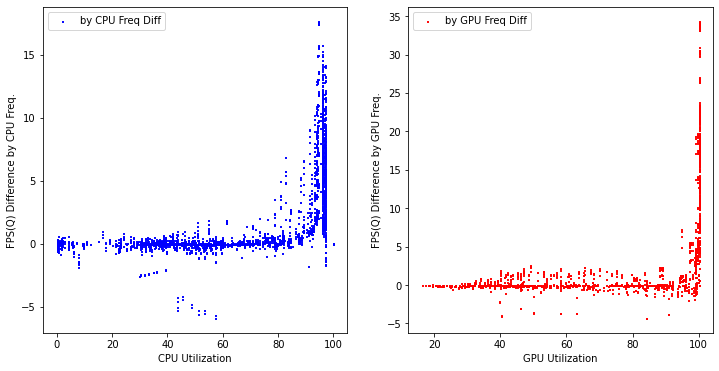

In [10]:
import matplotlib.pyplot as plt 

X1 = df1['Uc']
y1 = df1['Q_delta']

fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(X1, y1, s=1, c='b', marker = 's', label='by CPU Freq Diff')
plt.xlabel('CPU Utilization')
plt.ylabel('FPS(Q) Difference by CPU Freq.')
plt.legend()

X2 = df2['Ug']
y2 = df2['Q_delta']

plt.subplot(122)
plt.scatter(X2, y2, s=1, c='r', marker = 's', label='by GPU Freq Diff')
plt.xlabel('GPU Utilization')
plt.ylabel('FPS(Q) Difference by GPU Freq.')
plt.legend()
plt.show()

# Correlation Matrix (Covariation) Visualization

(4320, 10)


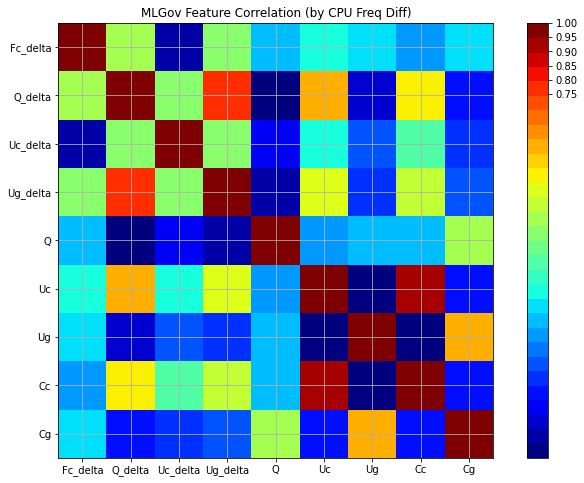

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm

df1 = pd.read_csv('./PDM-RG20r1a3b4.csv')
df1.head(3)
features1 = ['Game','Fc_delta','Q_delta', 'Uc_delta', 'Ug_delta', 'Q', 'Uc', 'Ug', 'Cc','Cg']
df1 = df1[features1]
print(df1.shape)
df1.head(3)

def correlation_matrix(df):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('MLGov Feature Correlation (by CPU Freq Diff)')
    labels=['Game','Fc_delta','Q_delta', 'Uc_delta', 'Ug_delta', 'Q', 'Uc', 'Ug', 'Cc','Cg']
    ax1.set_xticklabels(labels,fontsize=10)
    ax1.set_yticklabels(labels,fontsize=10)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df1)

(2700, 10)


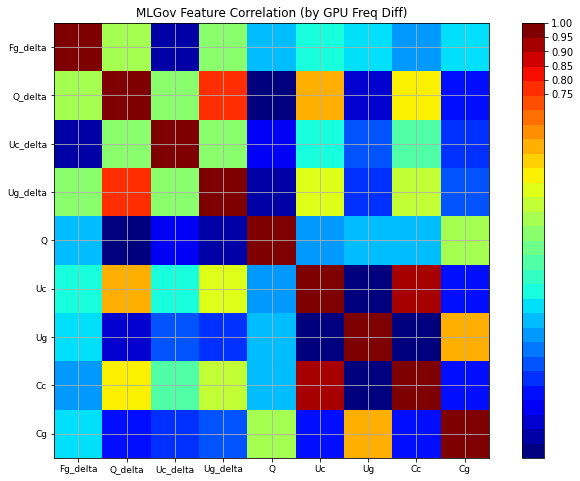

In [14]:
df2 = pd.read_csv('./PDM-RG20r2b3a4.csv')
features2 = ['Game','Fg_delta','Q_delta', 'Uc_delta', 'Ug_delta', 'Q', 'Uc', 'Ug', 'Cc','Cg']
df2 = df2[features2]
print(df2.shape)

def correlation_matrix(df):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('MLGov Feature Correlation (by GPU Freq Diff)')
    labels=['Game','Fg_delta','Q_delta', 'Uc_delta', 'Ug_delta', 'Q', 'Uc', 'Ug', 'Cc','Cg']
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df1)